In [1]:
from myopacus.accountants.rpdp_utils import GENERATE_EPSILONS_FUNC
import numpy as np
import pandas as pd
import os

all_results = []
results_dir = "./original_submission_results/fed_heart_disease/"
all_results.append(pd.read_csv(os.path.join(results_dir, "results_heart_disease.csv")))
results_dir = "./original_submission_results/fed_mnist_iid"
all_results.append(pd.read_csv(os.path.join(results_dir, "results_mnist.csv")))
results_dir = "./original_submission_results/fed_mnist_niid"
all_results.append(pd.read_csv(os.path.join(results_dir, "results_mnist.csv")))

SETTINGS = {
    "ThreeLevels": [[[0.7,0.2,0.1], [0.1, 1.0, 5.0]]],
    "BoundedPareto": [[4, 0.1]], 
    "BoundedMixGauss": [[[0.7,0.2,0.1], [(0.1, 0.05), (1.0, 0.1), (5.0, 0.5)]]],
}
MIN_EPSILON, MAX_EPSILON = 0.1, 10.0
BoundedFunc = lambda values: np.array([min(max(x, MIN_EPSILON), MAX_EPSILON) for x in values])

enames = ["ThreeLevels", "BoundedMixGauss", "BoundedPareto"]
methods = ['PrivacyFree', 'Ours', 'Dropout', 'StrongForAll']
datasets = ['Fed-Heart-Disease', 'MNIST-IID', 'MNIST-NonIID']

linestyle_str = [
    ("solid", "solid"),  # Same as (0, ()) or '-'
    ("dotted", "dotted"),  # Same as (0, (1, 1)) or ':'
    ("dashed", "dashed"),  # Same as '--'
    ("dashdot", "dashdot"),
]
linestyle_tuple = [
    ("loosely dotted", (0, (1, 10))),
    ("densely dotted", (0, (1, 1))),
    ("loosely dashed", (0, (5, 10))),
    ("densely dashed", (0, (5, 1))),
    ("loosely dashdotted", (0, (3, 10, 1, 10))),
    ("densely dashdotted", (0, (3, 1, 1, 1))),
    ("dashdotdotted", (0, (3, 5, 1, 5, 1, 5))),
    ("loosely dashdotdotted", (0, (3, 10, 1, 10, 1, 10))),
    ("densely dashdotdotted", (0, (3, 1, 1, 1, 1, 1))),
]
linestyles = linestyle_tuple + linestyle_str
legend_font = {'style': 'normal', 'size': 8, 'weight': "normal"}
label_font = {'family':'sans-serif', 'size': 10.5, 'weight': "normal"}
title_font = {'family':'sans-serif', 'size': 10.5, 'weight': "bold"}

In [2]:
# import json
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# from mpl_toolkits.axes_grid1.inset_locator import mark_inset
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set_style('whitegrid', {'axes.linewidth': 1, 'axes.edgecolor':'black'}) 

# # vision
# plt.close('all')
# fig, axs = plt.subplots(3, 4, figsize=(12, 8), constrained_layout=True, dpi=500)

# total_points = 1000
# for i, ename in enumerate(enames):
#     for j, params in enumerate(SETTINGS[ename]):
#         target_epsilons = BoundedFunc(GENERATE_EPSILONS_FUNC[ename](total_points, params))
#         sns.histplot(x=target_epsilons, stat="count", ax=axs[i][0], label=f'params{j}')
    
#     axs[i][0].set_title(f'{ename}', **title_font)
#     axs[i][0].set_ylabel('Density', **label_font)
#     axs[i][0].set_xlabel('Epsilon', **label_font)
#     axs[i][0].tick_params(labelsize=8)
    
#     # ===============
#     if ename != 'ThreeLevels':
#         # Add a child inset Axes to this existing Axes
#         axin = inset_axes(axs[i][0], width='50%', height='40%', loc='lower center', 
#                            bbox_to_anchor=(0.1,0.3,1,1), 
#                            bbox_transform=axs[i][0].transAxes)
#         sub_temp = sns.histplot(x=target_epsilons[target_epsilons >= 1.5], ax=axin, stat="count")
#         #color=sns.color_palette()[4]
        
#         # ax4in.set_ylim(0, 30)
#         axin.tick_params(labelsize=8)
#         mark_inset(axs[i][0], axin, loc1=1, loc2=3, fc="none", ec='k', lw=1)
#         axin.set_ylabel(None, **label_font)
#     # ===============

# for i, e in enumerate(enames):
#     for k, ds in enumerate(datasets):
#         results = all_results[k]
#         nm = [nm for nm in results["nm"].unique() if not (np.isnan(nm))][0]
#         d = [d for d in results["d"].unique() if not (np.isnan(d))][0]
        
#         for j, method in enumerate(methods):
#             if method == "PrivacyFree":
#                 cdf = results.loc[results["e"] == method]
#             else:
#                 cdf = results.loc[results["e"].str.contains(e, na=False)].loc[results["e"].str.contains(method, na=False)].loc[results["d"] == d].loc[results["nm"] == nm]
#             perf_str = np.array(cdf["perf"].tolist())
#             data_arr = np.array([json.loads(_str) for _str in perf_str])
#             data_mean = data_arr.mean(axis=0)
#             data_std = data_arr.std(axis=0)
#             label = method if method != "StrongForAll" else "Minimum"
#             sns.lineplot(data=data_mean, label=label, linestyle=linestyles[::-1][j][1], ax=axs[i][k+1])

#         axs[i][k+1].set_title(f'{ds}', **title_font)
#         axs[i][k+1].legend(loc='upper right', prop=legend_font)
#         axs[i][k+1].set_ylabel('Test Acc', **label_font)
#         axs[i][k+1].set_xlabel('Round', **label_font)
#         if k == 0:
#             axs[i][k+1].set_ylim(0.55, 0.8)
#         else:
#             axs[i][k+1].set_ylim(0., 1.)
#         axs[i][k+1].set_xticks(range(15))
#         axs[i][k+1].tick_params(labelsize=8)
#         axs[i][k+1].legend(loc='lower right', prop=legend_font)

# plt.savefig("fed_6plots.pdf", dpi=500, bbox_inches='tight')
# plt.show()

In [3]:
results_heart = {
    "norm_sq_budgets": [5, 20, 100],
    "max_grad_norm": 1.0,
    "results": pd.read_csv("../advantage_study/results_filter.csv")
}
results_mnist = {
    "norm_sq_budgets": [100, 500, 2500],
    "max_grad_norm": 5.0,
    "results": pd.read_csv("../advantage_study/results_filter.csv")
}

sec1 = np.array(results_heart["results"]["seconds"].tolist()).mean()
sec2 = np.array(results_mnist["results"]["seconds"].tolist()).mean()
sec1, sec2

(0.008580733944954129, 0.008580733944954129)

second: heart disease = 0.0086, mnist = 0.0086


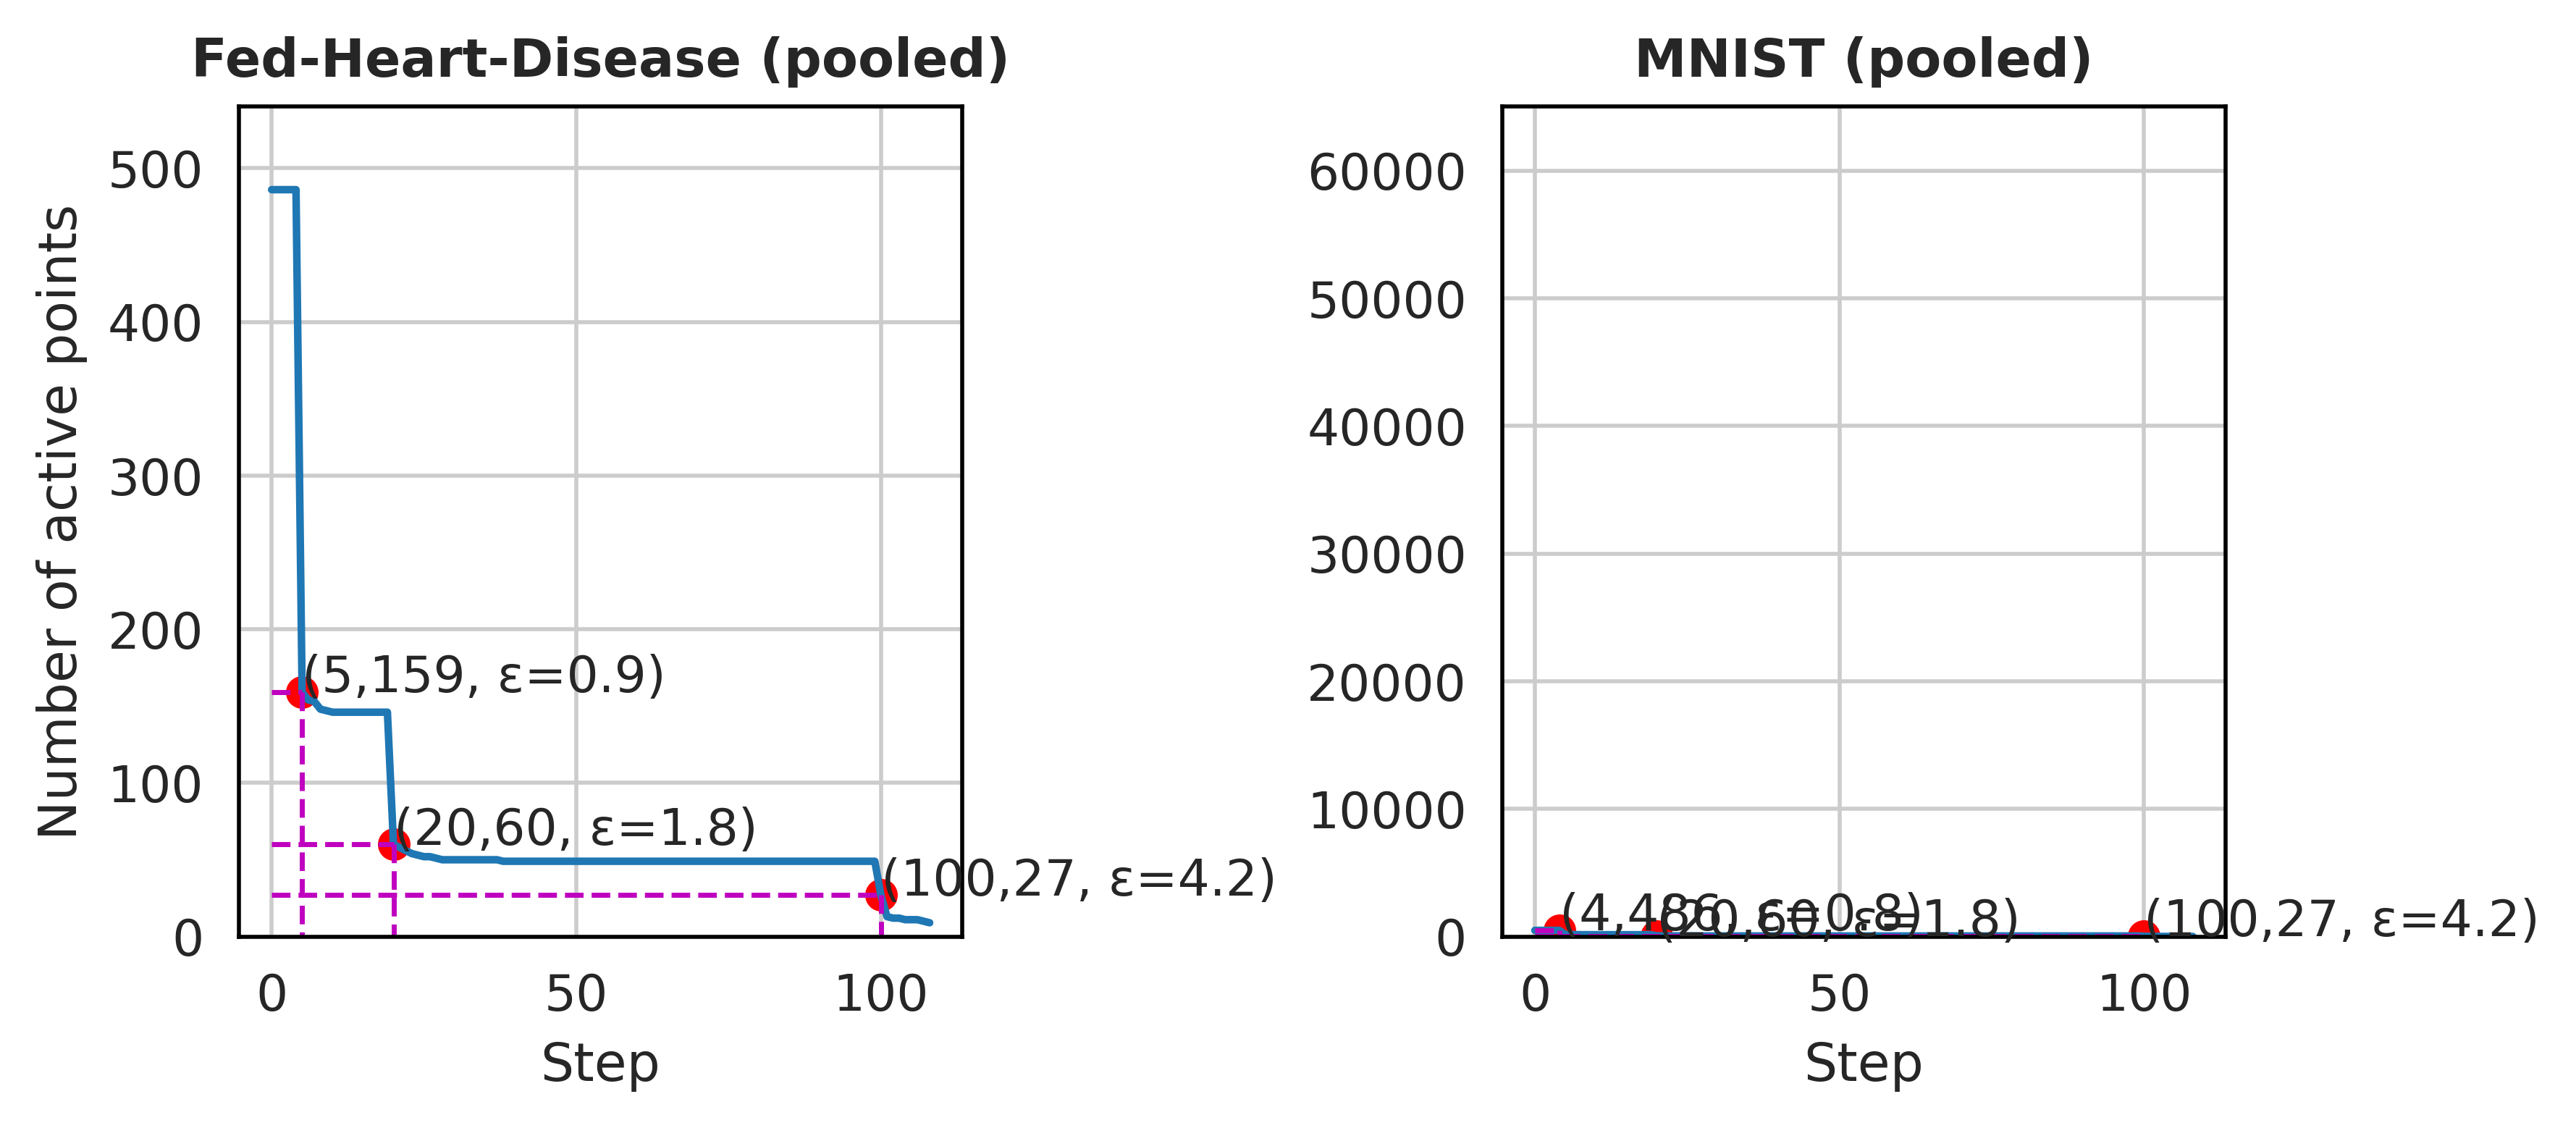

In [6]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid', {'axes.linewidth': 1, 'axes.edgecolor':'black'}) 

def draw_spot(ax, x0, y0, z0):
    ax.scatter(x0, y0, s=30, color='r')
    ax.plot([x0, x0], [y0, 0], 'm--', lw=1)
    ax.plot([0, x0], [y0, y0], 'm--', lw=1)
    show_spot = '(' + str(x0) + ',' + str(y0) + ', ε=' + str(z0) + ')'
    ax.annotate(show_spot, xy=(x0, y0), xytext=(x0, y0))
    
fig, axs = plt.subplots(1, 2, figsize=(7, 3), constrained_layout=True, dpi=500)

sns.lineplot(data=np.array(results_heart["results"]["num_active_points"].tolist()), ax=axs[0])
running_eps = results_heart["results"]["e"].tolist()
x = int(np.floor(results_heart["norm_sq_budgets"][0]/results_heart["max_grad_norm"]**2))
y = results_heart["results"]["num_active_points"][x]
z = round(list(json.loads(running_eps[x]).values())[0], 1)
draw_spot(axs[0], x, y, z)

x = int(np.floor(results_heart["norm_sq_budgets"][1]/results_heart["max_grad_norm"]**2))
y = results_heart["results"]["num_active_points"][x]
z = round(list(json.loads(running_eps[x]).values())[1], 1)
draw_spot(axs[0], x, y, z)

x = int(np.floor(results_heart["norm_sq_budgets"][2]/results_heart["max_grad_norm"]**2))
y = results_heart["results"]["num_active_points"][x]
z = round(list(json.loads(running_eps[x]).values())[2], 1)
draw_spot(axs[0], x, y, z)

axs[0].set_xlabel("Step", **label_font)
axs[0].set_ylabel("Number of active points", **label_font)
axs[0].set_ylim(0, 540)
axs[0].set_title("Fed-Heart-Disease (pooled)", **title_font)

sns.lineplot(data=np.array(results_mnist["results"]["num_active_points"].tolist()), ax=axs[1])
running_eps = results_mnist["results"]["e"].tolist()
x = int(np.floor(results_mnist["norm_sq_budgets"][0]/results_mnist["max_grad_norm"]**2))
y = results_mnist["results"]["num_active_points"][x]
z = round(list(json.loads(running_eps[x]).values())[0], 1)
draw_spot(axs[1], x, y, z)

x = int(np.floor(results_mnist["norm_sq_budgets"][1]/results_mnist["max_grad_norm"]**2))
y = results_mnist["results"]["num_active_points"][x]
z = round(list(json.loads(running_eps[x]).values())[1], 1)
draw_spot(axs[1], x, y, z)

x = int(np.floor(results_mnist["norm_sq_budgets"][2]/results_mnist["max_grad_norm"]**2))
y = results_mnist["results"]["num_active_points"][x]
z = round(list(json.loads(running_eps[x]).values())[2], 1)
draw_spot(axs[1], x, y, z)

axs[1].set_xlabel("Step", **label_font)
axs[1].set_ylim(0, 65000)
axs[1].set_title("MNIST (pooled)", **title_font)

plt.savefig('filter_active_points.pdf', bbox_inches='tight')
print(f"second: heart disease = {sec1:.4f}, mnist = {sec2:.4f}")
